In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [9]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import os

In [10]:
current_dir = os.getcwd()
file_path = current_dir + "/spotify-2023.csv"
print(file_path)

C:\Users\Shivangi\Downloads\Wysa_DA_Assessment/spotify-2023.csv


In [11]:
df=pd.read_csv(file_path, encoding='unicode_escape') #import CSV file

In [12]:
df.shape # no. of row and column

(953, 24)

In [13]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**DATA CLEANING**

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Table:")
print(missing_values)

Missing Values Table:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [16]:
# 'in_shazam_charts' with a default value (0)
df['in_shazam_charts'].fillna(0, inplace=True)

In [17]:
df.dropna(subset=['key'],inplace= True)

In [18]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (858, 24)


In [19]:
#  Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [20]:
# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [21]:
# Concatenate year, month, and day columns into a single 'release_date' column
df['release_date'] = df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%Y-%m-%d')

In [22]:
# Drop unnecessary columns
columns_to_drop = ['released_year', 'released_month', 'released_day']
df.drop(columns=columns_to_drop, inplace=True)

In [23]:
# Check for duplicate values
duplicates = df.duplicated()
print("duplicates Values in a Table:")
print(duplicates)

duplicates Values in a Table:
0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 858, dtype: bool


In [17]:
# Convert categorical columns to lowercase for consistency
df['mode'] = df['mode'].str.lower()

In [18]:
# Save cleaned data to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

In [19]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703.0,43,263,45,10,...,B,major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286.0,48,126,58,14,...,C#,major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974.0,94,207,91,14,...,F,major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817.0,116,207,125,12,...,A,major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322.0,84,133,87,15,...,A,minor,65,23,80,14,63,11,6,2023-05-18


**Data Analysis and Visualization**

In [20]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,858.000000,858.000000,858.000000,8.570000e+02,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858
mean,1.551282,5202.284382,11.945221,5.133554e+08,67.324009,50.984848,2.616550,122.827506,67.256410,51.247086,64.344988,26.621212,1.609557,18.173660,10.388112,2018-09-10 21:10:29.370629120
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,860.250000,0.000000,1.391938e+08,13.000000,7.000000,0.000000,100.000000,57.000000,32.000000,53.250000,5.000000,0.000000,10.000000,4.000000,2020-06-10 18:00:00
50%,1.000000,2226.000000,3.000000,2.849083e+08,34.000000,38.000000,0.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,5529.250000,16.000000,6.740727e+08,85.000000,84.750000,2.000000,141.750000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000,2022-11-04 00:00:00
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,46.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.864335,7939.794527,19.187353,5.714855e+08,86.529670,50.408122,5.768264,28.183522,14.652712,23.594781,16.047766,25.681877,8.565909,13.561611,10.088162,NaN


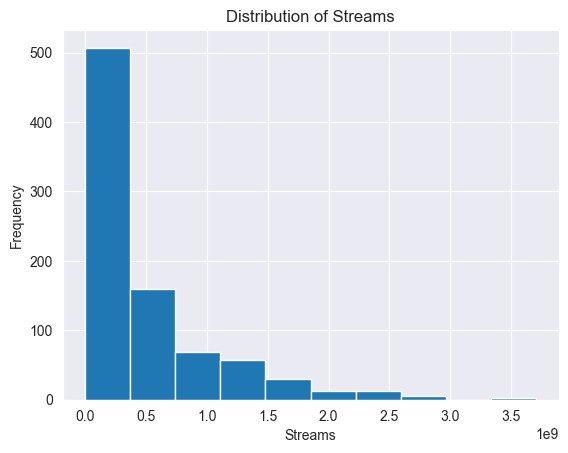

In [21]:
# data distibution
df['streams'].hist()
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Aggregate data by summing streams per year
aggregated_data = df.groupby('release_year')['streams'].sum().reset_index()

# Display aggregated data
print("\nAggregated Data:")
print(aggregated_data)


Aggregated Data:
    release_year       streams
0           1930  9.059852e+07
1           1942  3.955914e+08
2           1946  3.897720e+08
3           1950  4.732483e+08
4           1957  9.199620e+08
5           1958  1.310563e+09
6           1959  5.734178e+08
7           1963  1.311263e+09
8           1970  5.200345e+08
9           1971  4.604928e+08
10          1973  8.385868e+08
11          1975  2.009095e+09
12          1979  4.039395e+08
13          1982  3.502754e+08
14          1983  1.593271e+09
15          1984  2.989928e+09
16          1985  2.230810e+09
17          1986  1.133676e+09
18          1987  1.553498e+09
19          1991  2.058840e+09
20          1992  1.271293e+09
21          1994  1.449779e+09
22          1995  1.937004e+09
23          1996  1.069331e+08
24          1997  1.037625e+08
25          1998  1.284943e+09
26          1999  5.403078e+09
27          2000  3.672857e+09
28          2002  8.679723e+09
29          2003  3.168043e+09
30          2004  2.8

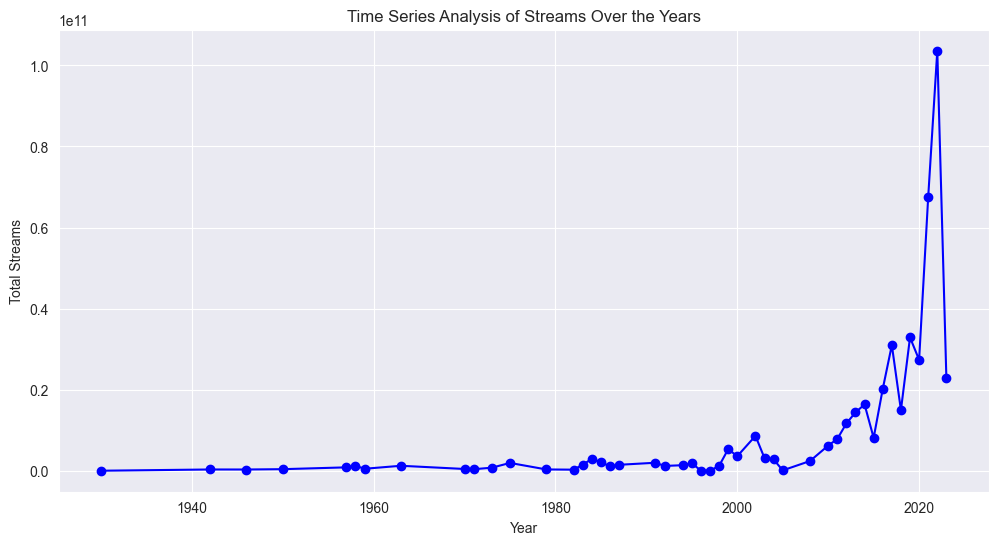

In [23]:
# Extract the year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Group by 'release_year' and sum the 'streams'
time_series_analysis = df.groupby('release_year')['streams'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_analysis.index, time_series_analysis.values, marker='o', linestyle='-', color='b')
plt.title('Time Series Analysis of Streams Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.grid(True)
plt.show()

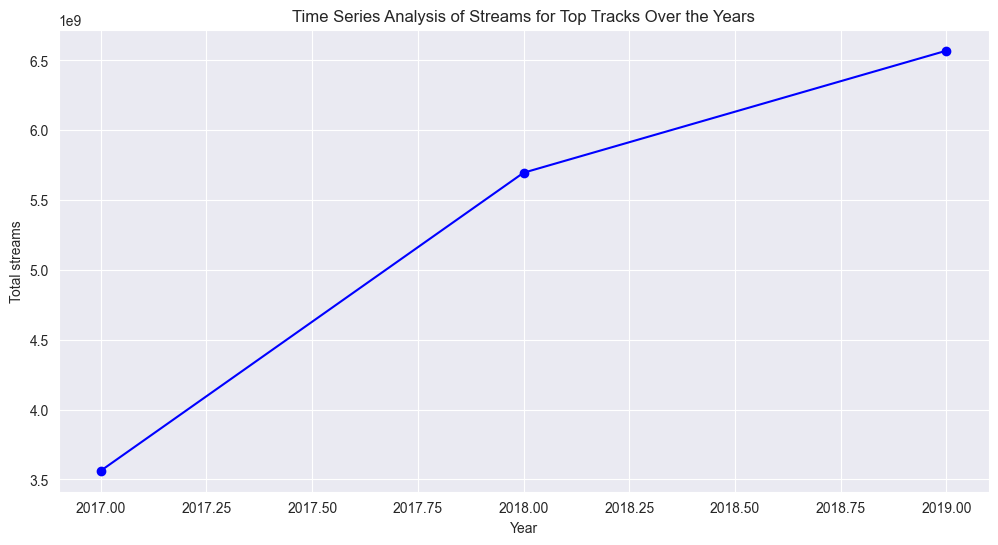

In [24]:
# Extract the year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Select the top tracks based on the 'streams' column
top_tracks = df.nlargest(5, 'streams')  # Change 5 to the desired number of top tracks

# Group by 'release_year' and sum the 'streams' for the top tracks
time_series_analysis = top_tracks.groupby('release_year')['streams'].sum()

# Plot the time series for the top tracks
plt.figure(figsize=(12, 6))
plt.plot(time_series_analysis.index, time_series_analysis.values, marker='o', linestyle='-', color='b')
plt.title('Time Series Analysis of Streams for Top Tracks Over the Years')
plt.xlabel('Year')
plt.ylabel('Total streams')
plt.grid(True)
plt.show()

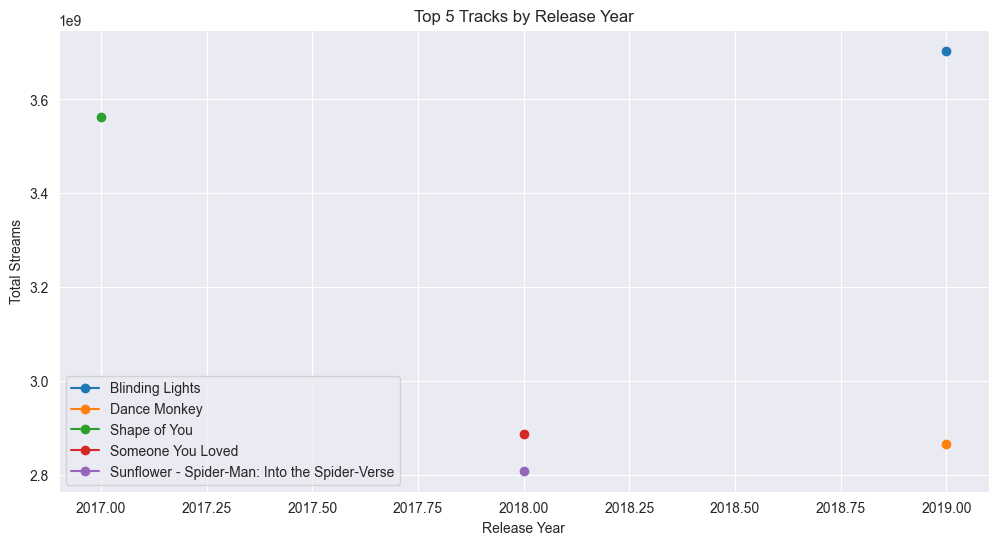

In [25]:
# Get the top 5 tracks based on the highest total streams
top_tracks = df.groupby('track_name')['streams'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 tracks
top_tracks_df = df[df['track_name'].isin(top_tracks)]

# Create a bar plot for the top 5 tracks by release year
plt.figure(figsize=(12, 6))
for track_name, group_df in top_tracks_df.groupby('track_name'):
    plt.plot(group_df['release_year'], group_df['streams'], label=track_name, marker='o')

plt.title('Top 5 Tracks by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Streams')
plt.legend()
plt.show()

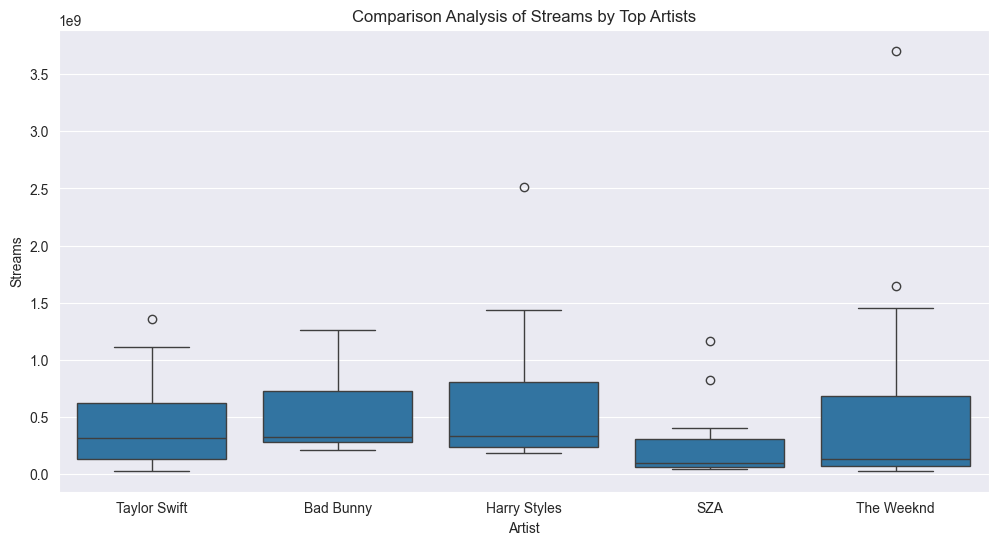

In [26]:
# Extract the year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Select a subset of the data for the comparison analysis (e.g., top 5 artists)
top_artists = df['artist(s)_name'].value_counts().nlargest(5).index
subset_df = df[df['artist(s)_name'].isin(top_artists)]

# Comparison analysis using box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist(s)_name', y='streams', data=subset_df)
plt.title('Comparison Analysis of Streams by Top Artists')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.show()

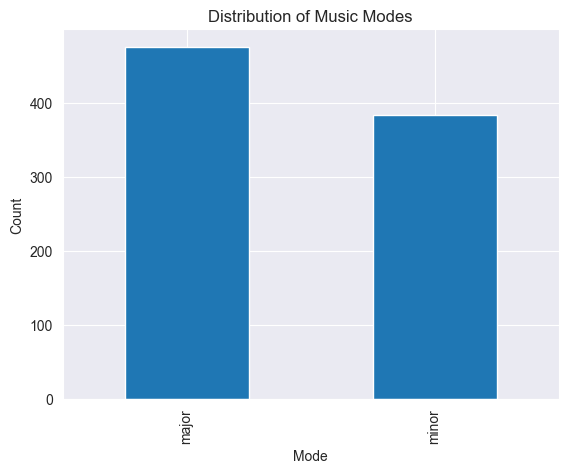

In [27]:
#Categorical Analysis
df['mode'].value_counts().plot(kind='bar')
plt.title('Distribution of Music Modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()


In [28]:
from scipy.stats import zscore

z_scores = zscore(df[['streams']])
outliers_mask = (z_scores > 3) | (z_scores < -3)
outliers_df = df[outliers_mask]

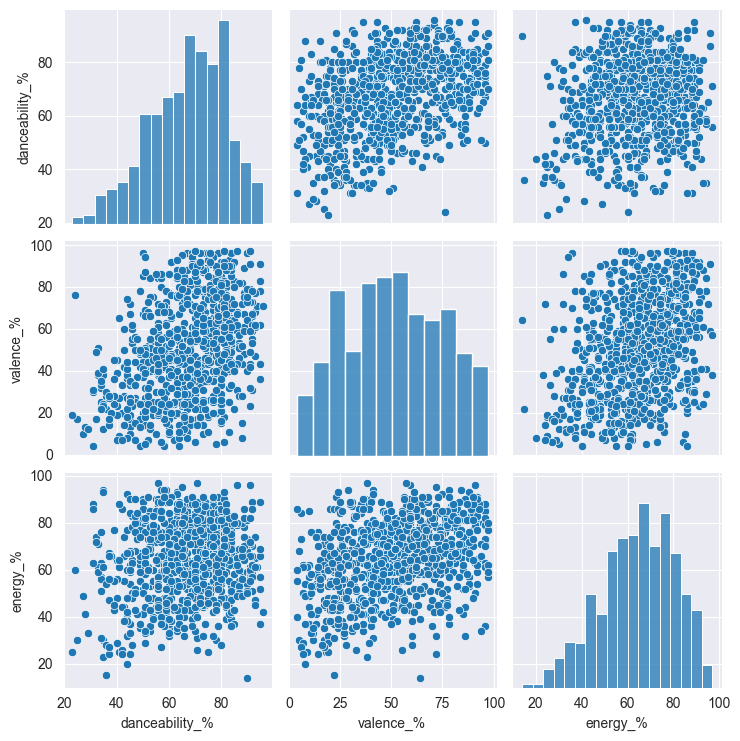

In [29]:
sns.pairplot(df[['danceability_%', 'valence_%', 'energy_%']])
plt.show()

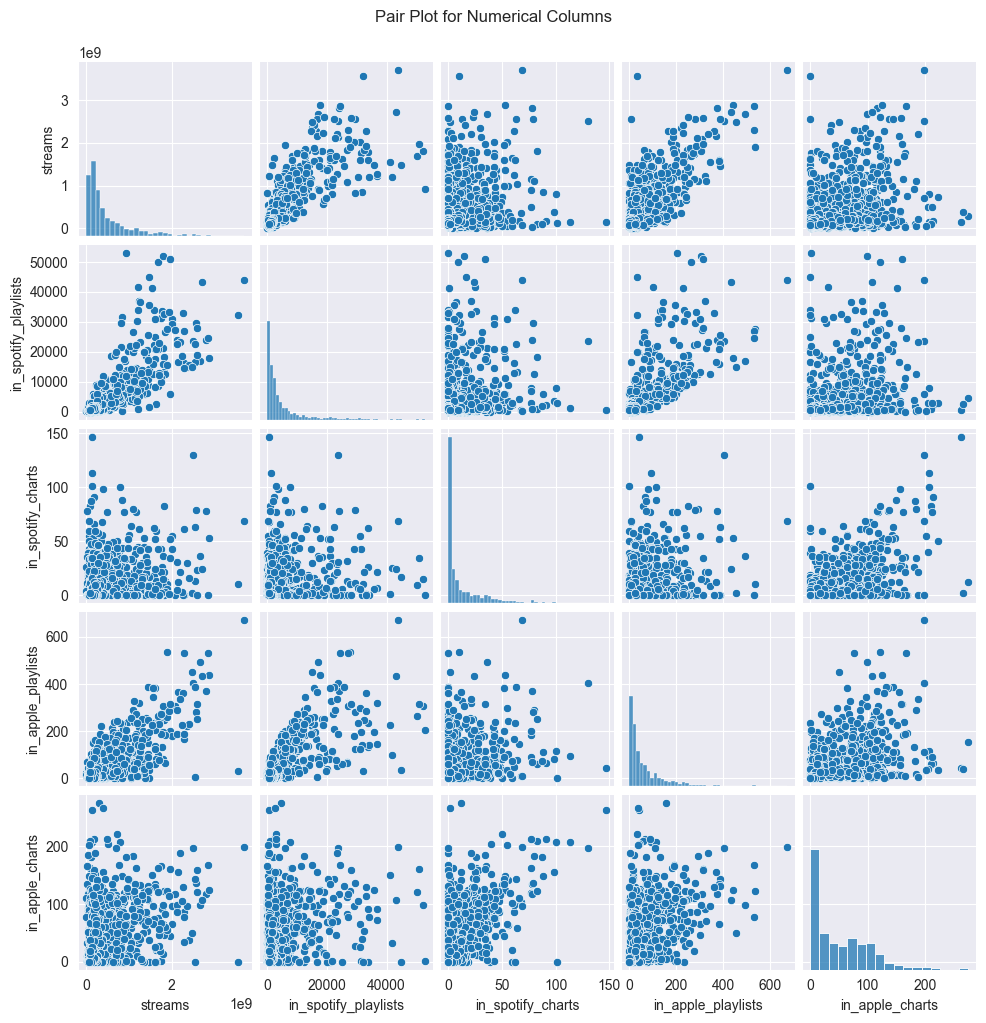

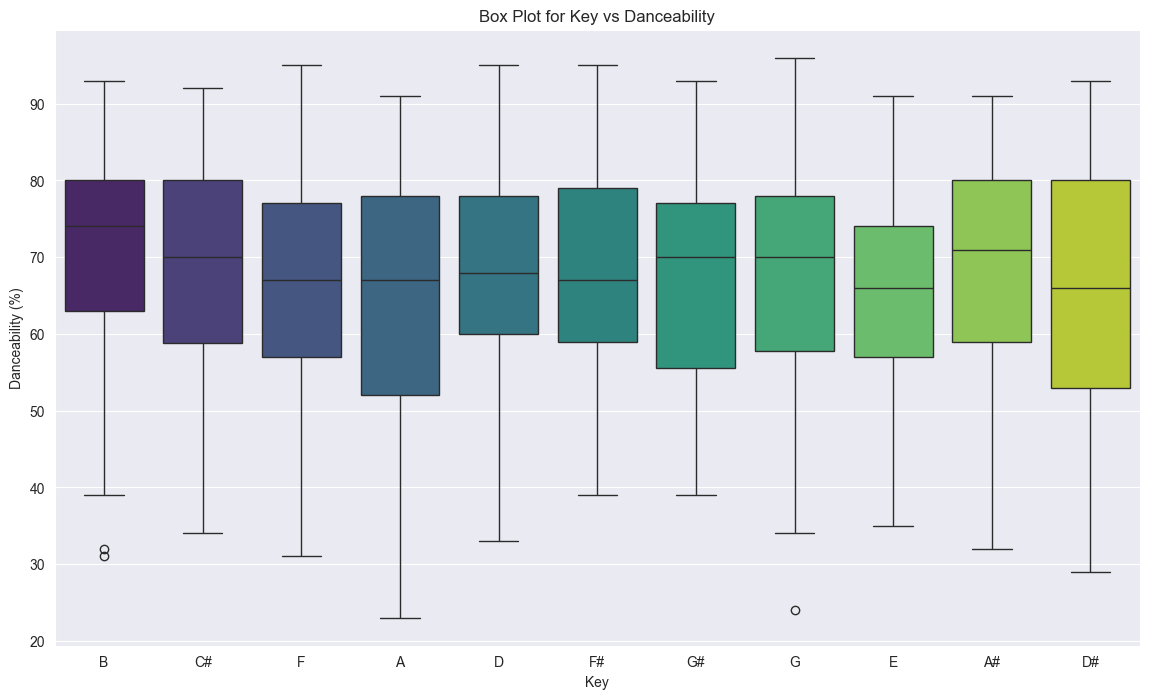

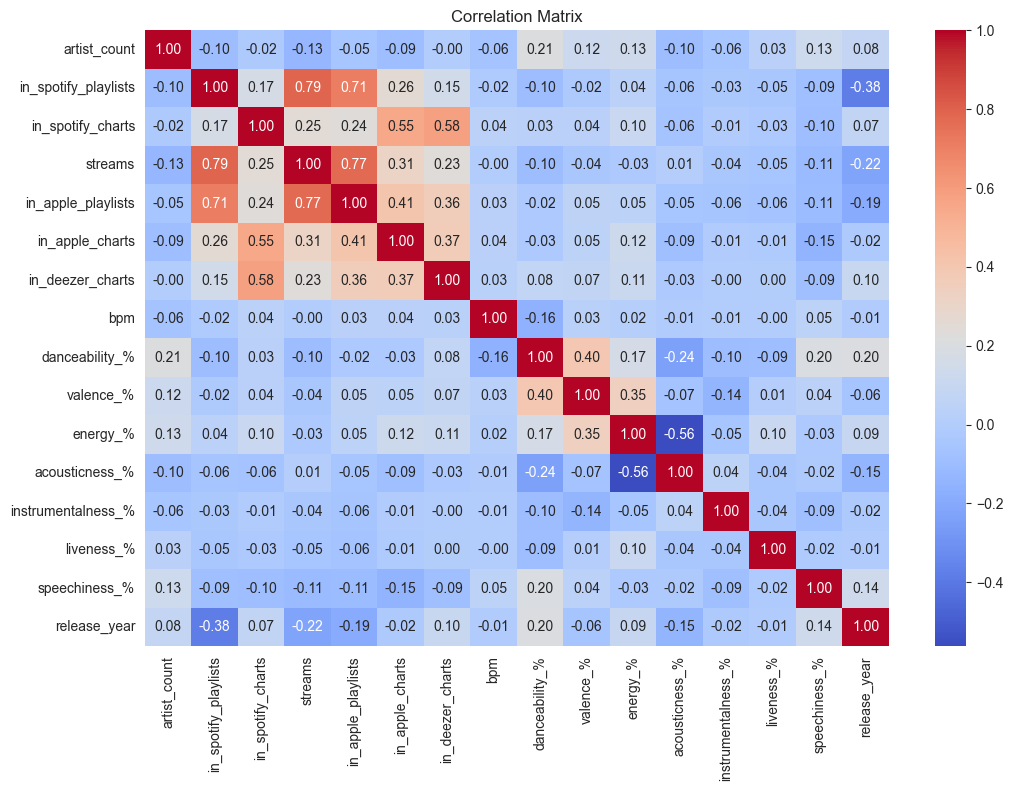

In [30]:
# Pair plot for numerical columns
sns.pairplot(df[['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']], height=2)
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

# Box plot for key and danceability
plt.figure(figsize=(14, 8))
sns.boxplot(x='key', y='danceability_%', data=df, palette='viridis', hue='key')
plt.title('Box Plot for Key vs Danceability')
plt.xlabel('Key')
plt.ylabel('Danceability (%)')
plt.show()

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
from scipy.stats import ttest_ind

# Extract streams for songs with key 'A' and 'B'
streams_key_A = df[df['key'] == 'A']['streams']
streams_key_B = df[df['key'] == 'B']['streams']

# Perform t-test
t_stat, p_value = ttest_ind(streams_key_A, streams_key_B, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant difference in mean streams between songs with key 'A' and 'B'.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in mean streams between songs with key 'A' and 'B'.")


T-statistic: nan
P-value: nan

Fail to reject the null hypothesis. There is no significant difference in mean streams between songs with key 'A' and 'B'.


In [32]:
correlation_matrix = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                 streams  danceability_%  valence_%  energy_%  acousticness_%
streams         1.000000       -0.100702  -0.042787 -0.029714        0.010798
danceability_% -0.100702        1.000000   0.396207  0.165901       -0.239009
valence_%      -0.042787        0.396207   1.000000  0.346939       -0.066854
energy_%       -0.029714        0.165901   0.346939  1.000000       -0.561699
acousticness_%  0.010798       -0.239009  -0.066854 -0.561699        1.000000
